In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
!pip install wordcloud

from sklearn.metrics import accuracy_score, confusion_matrix
, roc_curve, plot_roc_curve, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('fakedata.csv')

In [4]:
data.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [5]:
data['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [6]:
data['text'][72131]

'Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.\n\nThe Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary\'s capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart \'due to safety reasons until further notice!\'\n\n"Many migrants, who couldn\'t understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.\n\nScuffles broke out when police ordered the passengers off the train at Bicske, according to

In [7]:
data=data.drop('Unnamed: 0',axis=1)

In [8]:
data.head()

title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

# Step 3: Handle null values and separate features from labels

In [12]:
data.fillna('', inplace= True)
features=data[['title','text']]
label=data['label']


In [13]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [14]:
label_Status = data['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(data, 
             values=quantity, 
             names=transactions, hole =.60, 
             title="Spam & Ham Status")
figure.show()

In [15]:
label_status1=data['label'].value_counts()
transactions1=label_status1.index
quantity1=transactions1.values

pi=px.pie(data,values=quantity,names=transactions1,title='Spam & Ham',hole=.60)
pi.show()

# Step 4: Create word clouds

In [17]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

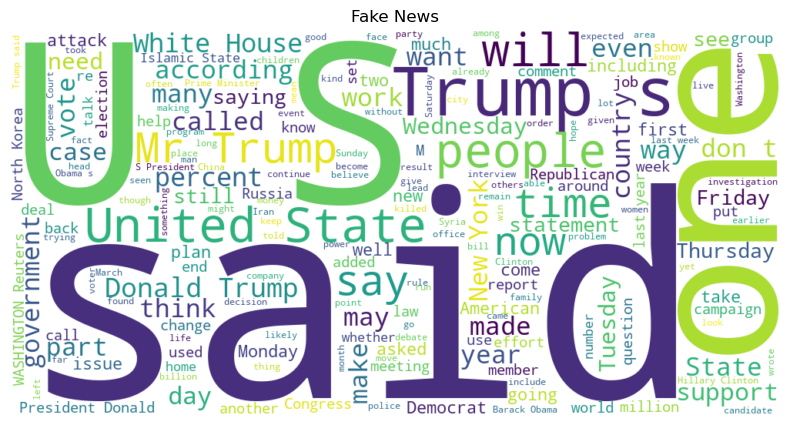

In [18]:
plot_wordcloud(fake_text, 'Fake News')
plt.show()

In [19]:
def word_cloud(text,title):
    word_cloud=WordCloud(width=800,height=350,background_color='white').generate(text)

    plt.figure(figsize=(10,15))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

fakeText=''.join(data[data['label']==1]['text'])
real_text=''.join(data[data['label']==0]['text'])

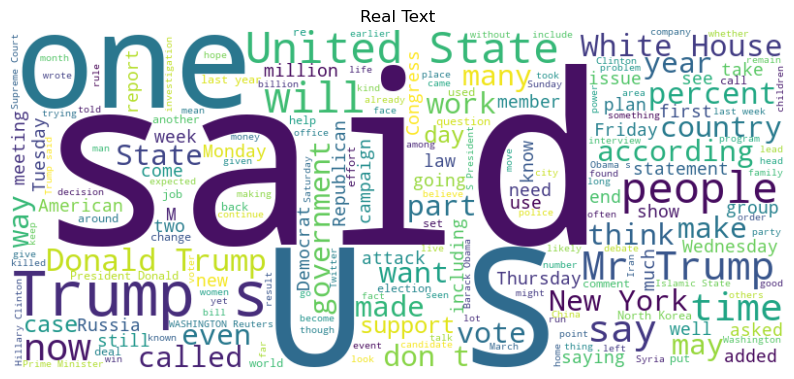

In [20]:
word_cloud(real_text,'Real Text')
plt.show()

In [21]:
text_column='text'
label_column='label'


In [337]:
stop_word=set(stopwords.words('english'))


In [339]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# step5: Text Processing

In [342]:

#filtered_text=[]
def text_process(text):
    #for doc in text:
       # words=word_tokenize(doc)
        #filter_words=[word for word in words if word not in stop_word]
        #filtered_text.append(''.join(filter_words))
        #return filtered_text
        
    remove_punctuation=[word for word in text if word not in string.punctuation]
    clean_word=''.join(remove_punctuation)

    remove_stopWords=[stop for stop in clean_word.split() if stop.lower() not in stop_word]
    
    return remove_stopWords

In [344]:
data[text_column]=data[text_column].apply(text_process)
data[text_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                           [post, vote, Hillary, already]
2        [demonstrator, gathered, last, night, exercisi...
3        [dozen, politically, active, pastor, came, pri...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

In [345]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [346]:
data[text_column]

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

# Step 7: TF-IDF Vectorization

In [348]:

vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [349]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

# step8 train test split

In [351]:
xtrain,xtest,ytrain,ytest=train_test_split(x,label,test_size=0.30,random_state=42)

# Step 09: Evaluate Naive Bayes models

In [353]:
#def evalute_models(model,xtest,ytest):
    #ypre=model.predict(xtest)
    #auc_scores=accuracy_score(ytest,ypre)
    #cm=confusion_matrix(ytest,ypre)
    #prob=model.predict_proba(xtest)
    #roc_auc = roc_auc_score(ytest, prob)
    #fpr, tpr, thresholds = roc_curve(ytest, prob)
   # precision, recall, _ = precision_recall_curve(ytest, prob)
   # pr_auc = auc(recall, precision)
    #return {
      #  'Accuracy': accuracy,
       # 'Confusion Matrix': cm,
   # }
    

In [354]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc,classification_report

# Convert ytest to a 1D array of class labels if it's not already
ytest_1d = np.argmax(ytest, axis=1) if ytest.ndim > 1 else ytest

# Define the evalute_models function
def evalute_models(model, xtest, ytest):
    ypre = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypre)
    cm = confusion_matrix(ytest, ypre)
    prob = model.predict_proba(xtest)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(ytest, prob)
    fpr, tpr, thresholds = roc_curve(ytest, prob)
    precision, recall, _ = precision_recall_curve(ytest, prob)
    pr_auc = auc(recall, precision)
    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc
    }




# Step 10: Build Naive Bayes models
# Multinomial Naive Bayes

In [356]:
nmb_model=MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None)
nmb_model.fit(xtrain,ytrain)

MultinomialNB()

In [358]:

nb_result = evalute_models(nmb_model, xtest, ytest_1d)



In [359]:
nb_result

{'Accuracy': 0.8766692851531814,
 'Confusion Matrix': array([[9714,  899],
        [1770, 9258]]),
 'ROC AUC': np.float64(0.9488985678454791),
 'PR AUC': np.float64(0.9482376933343801)}

# create hit map

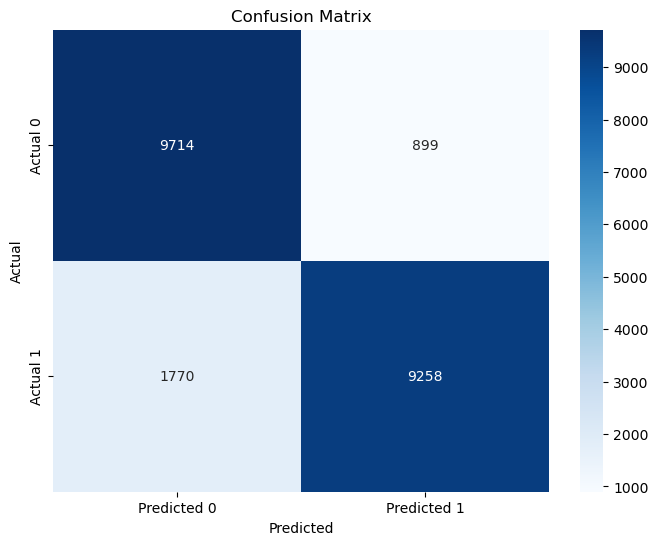

In [361]:
cm=nb_result['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
    

In [362]:
print(classification_report(ytest, nmb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



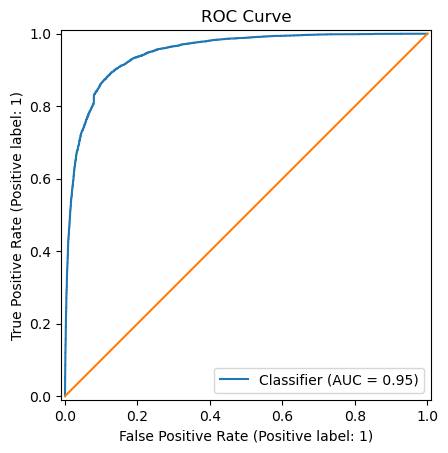

In [363]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming you have the necessary imports and your model is defined
nb_result = evalute_models(nmb_model, xtest, ytest_1d)

# Extract probabilities for the positive class
y_proba = nmb_model.predict_proba(xtest)[:, 1]

# Display the ROC curve
RocCurveDisplay.from_predictions(ytest_1d, y_proba)
plt.plot([0,1],[0,1])
plt.title('ROC Curve')
plt.show()


# Bernoulli Naive Bayes

In [365]:
bnb_model=BernoulliNB(binarize=0.0,alpha=1.0,fit_prior=True,class_prior=None)

In [366]:
bnb_model.fit(xtrain,ytrain)

BernoulliNB()

In [367]:
bnb_result=evalute_models(bnb_model,xtest,ytest)
bnb_result

{'Accuracy': 0.8547664156000185,
 'Confusion Matrix': array([[8575, 2038],
        [1105, 9923]]),
 'ROC AUC': np.float64(0.9418619876506666),
 'PR AUC': np.float64(0.9527529065979186)}

In [368]:
cm_bnb=confusion_matrix(ytest,bnb_model.predict(xtest))
cm_bnb

array([[8575, 2038],
       [1105, 9923]])

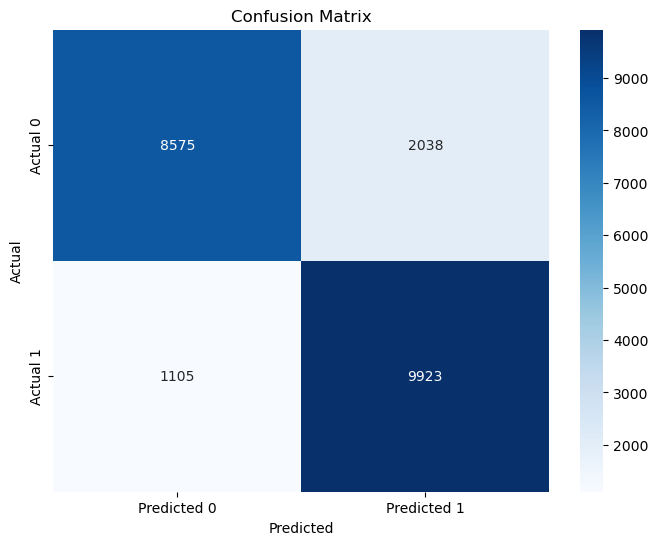

In [369]:

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

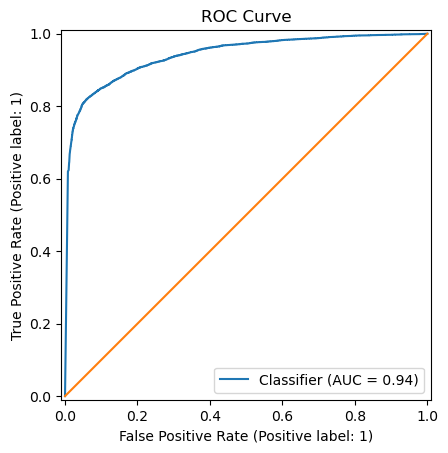

In [370]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming you have the necessary imports and your model is defined
nb_result = evalute_models(bnb_model, xtest, ytest_1d)

# Extract probabilities for the positive class
y_proba = bnb_model.predict_proba(xtest)[:, 1]

# Display the ROC curve
RocCurveDisplay.from_predictions(ytest_1d, y_proba)
plt.plot([0,1],[0,1])
plt.title('ROC Curve')
plt.show()


# Implement Logestic Regression

In [372]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

# Step 12: Evaluate Logistic Regression

In [374]:
lr_result=evalute_models(lr,xtest,ytest)
lr_result

{'Accuracy': 0.9508802735548265,
 'Confusion Matrix': array([[ 9973,   640],
        [  423, 10605]]),
 'ROC AUC': np.float64(0.9897368906625934),
 'PR AUC': np.float64(0.9896610841127474)}

In [375]:
cm_lr=confusion_matrix(ytest,lr.predict(xtest))
cm_lr

array([[ 9973,   640],
       [  423, 10605]])

# make a heat map

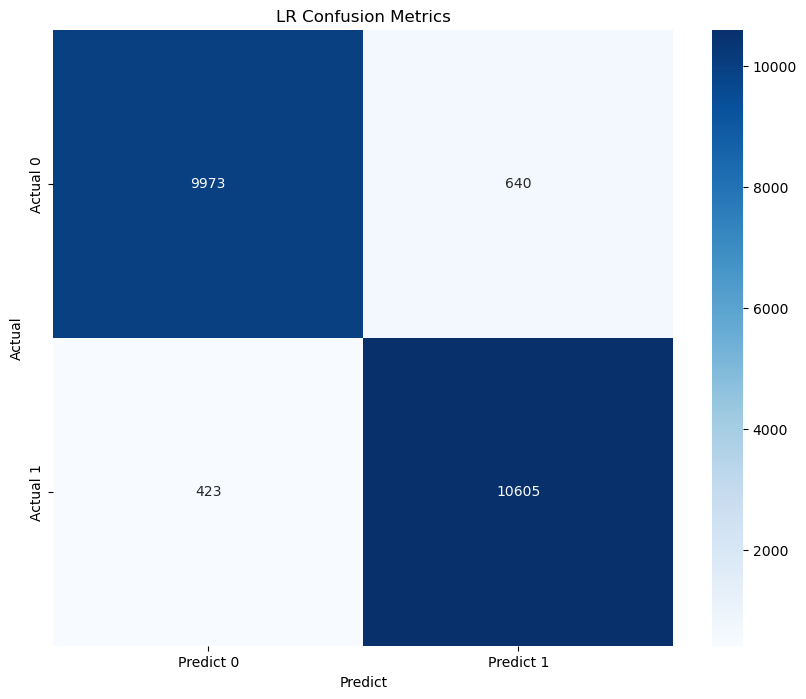

In [377]:
plt.figure(figsize=(10,8))
sns.heatmap(cm_lr,annot=True,cmap='Blues',fmt='d',
            xticklabels=['Predict 0','Predict 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.title('LR Confusion Metrics')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [378]:
lr_result = evalute_models(lr, xtest, ytest_1d)

In [379]:
yproba=lr.predict_proba(xtest)[:, 1]

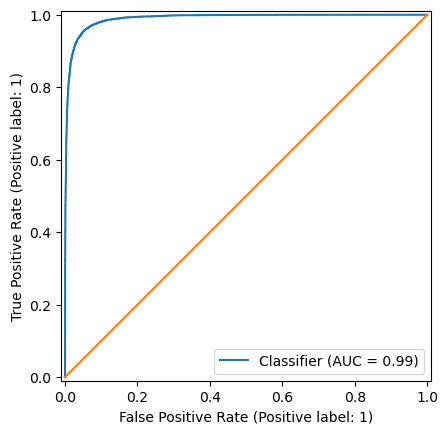

In [380]:
RocCurveDisplay.from_predictions(ytest_1d,yproba)
plt.plot([0,1],[0,1])
plt.show()

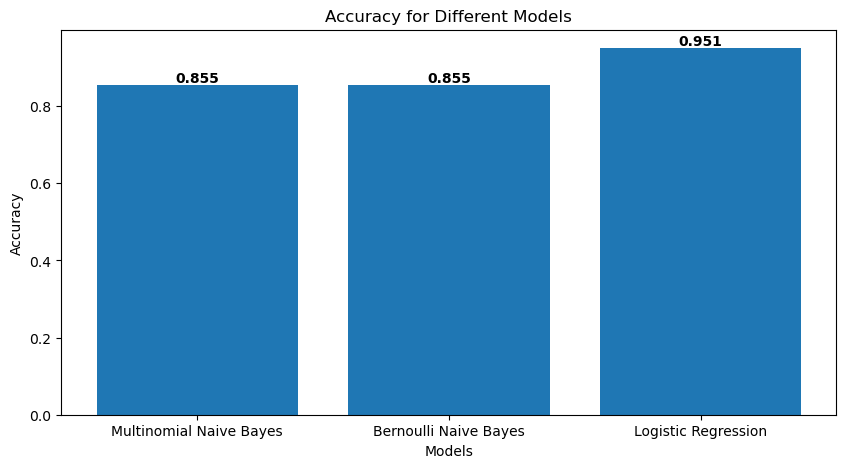

In [381]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

accuracy_values = [nb_result['Accuracy'], bnb_result['Accuracy'], lr_result['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')

In [ ]:
models=[nmb_model,bnb_model,lr]
random_input=input()

procesText=text_process(random_input)
textLrmatize=lemmatize_text(procesText)
vectoText=vectorizer.transform([textLrmatize])
for model in models:
    prediction=model.predict(vectoText)
    print(f'Model:{type(model).__name__}')
    if prediction==1:
       print('Detected Result is : Fake News')
    else:
        print('Detected Result is : Real News')
    
    print('\n')

In [278]:
procesText


['investigation',
 'in',
 'cases',
 'filed',
 'on',
 'allegations',
 'of',
 'rape',
 'and',
 'torture',
 'of',
 'women',
 'to',
 '15',
 'days',
 'from',
 'existing',
 '30',
 'days',
 'The',
 'time',
 'of',
 'the',
 'trial',
 'will',
 'have',
 'to',
 'be',
 'completed',
 'within',
 '90',
 'days',
 'in',
 'those',
 'cases',
 'The',
 'government',
 'will',
 'finalise',
 'the',
 'time',
 'after',
 'necessary',
 'discussions',
 'with',
 'stakeholders',
 'law',
 'adviser',
 'Asif',
 'Nazrul',
 'said',
 'at',
 'a',
 'media',
 'briefing',
 'at',
 'the',
 'law',
 'ministry',
 'Sunday',
 'Home',
 'adviser',
 'Lieutenant',
 'General',
 'retd',
 'Jahangir',
 'Alam',
 'Chowdhury',
 'and',
 'information',
 'and',
 'broadcast',
 'adviser',
 'Md',
 'Mahfuj',
 'Alam',
 'also',
 'addressed',
 'the',
 'news',
 'briefing']

In [279]:
textLrmatize


'investigation in case filed on allegation of rape and torture of woman to 15 day from existing 30 day The time of the trial will have to be completed within 90 day in those case The government will finalise the time after necessary discussion with stakeholder law adviser Asif Nazrul said at a medium briefing at the law ministry Sunday Home adviser Lieutenant General retd Jahangir Alam Chowdhury and information and broadcast adviser Md Mahfuj Alam also addressed the news briefing'

In [280]:
vectoText.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

# save the good models

In [282]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'Multinomial Naive Bayes.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(nmb_model, model_file)

In [283]:
with open(model_file_path, 'rb') as model_file:
    loaded_LR = pickle.load(model_file)

In [284]:
loaded_LR.predict(xtest)

array([1, 1, 0, ..., 1, 1, 0])

In [285]:
loaded_LR.score(xtest, ytest)

0.876576867982071

In [286]:
loaded_LR.predict(vectoText)

array([0])